In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 41절: 주성분 분석

# PCA

PCA(Principal Component Analysis)는 주성분 분석이라고도 하며 차원 축소를 통해 최소 차원의 정보로 원래 차원의 정보를 모사(approximate)하려는 작업

## 차원 축소

고차원 벡터에서 일부 차원의 값을 모두 0으로 만들어(truncation) 저차원 벡터로 줄임

다만 원래의 고차원 벡터의 특성을 최대한 살리기 위해 가장 분산이 높은 방향으로 회전 변환(rotation transform)을 함 


## PCA와 고유값 분해

직교 변환 행렬 W 을 찾는 것과 동일

직교행렬 : 어떤행렬이 그 행렬의 전치행렬과 그 행렬의 역행렬이 서로 같을때 어떤 행렬

W 값은 공분산 행렬  XXT 의 고유값 분해(eigenvalue decomposition)를 사용하여 찾을 수 있다. W 의 각 열은 가장 큰 고유값부터 D 개의 순차적인 고유값에 대응하는 고유 벡터로 이루어진다.


### Scikit-Learn 의 PCA 기능
**  PCA 클래스 **

* 입력 인수:
    - n_components : 정수
         최종 성분의 수


* 속성:
    - components_
         주성분 축
    - n_components_
         주성분의 수
    - mean_ :
         각 성분의 평균
    - explained_variance_ratio_
         각 성분의 분산 비율
         
         
* 주성분 분석 참고 <br>

http://antilibrary.org/1091

    주성분 분석은 데이터를 한개의 축으로 사상시켰을 때 그 분산이 가장 커지는 축
    새로운 좌표계로 데이터를 선형 변환
    주로 분산을 그대로 유지하고 고차원에서 저차원으로 축소 할 수 있도록 함 
    
https://wikidocs.net/7646

    그림4 참고 분산이 클수록 원래 데이터의 형태를 반영 할 수 있다. 
    
    
* 공분산 
    
    둘 이상의 변량이 연관성을 가지며 분포하는 모양을 전체적으로 나타낸 분산 
    

## 2차원 PCA의 예

(-4, 4)

(-3, 3)

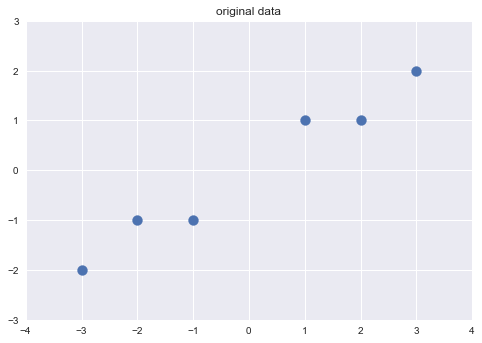

In [3]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("original data")
plt.show()

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
# X 값들에 대해서 바뀐 차원의 x,y 값
Z = pca.transform(X)
Z

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

In [6]:
# pca.get_covariance() 공분산 np.linalg.eig() 고유값 
w, V = np.linalg.eig(pca.get_covariance())
w, V

(array([ 6.61628593,  0.05038073]), array([[ 0.83849224, -0.54491354],
        [ 0.54491354,  0.83849224]]))

In [7]:
V.T.dot(X.T).T

array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

(-4, 4)

(-3, 3)

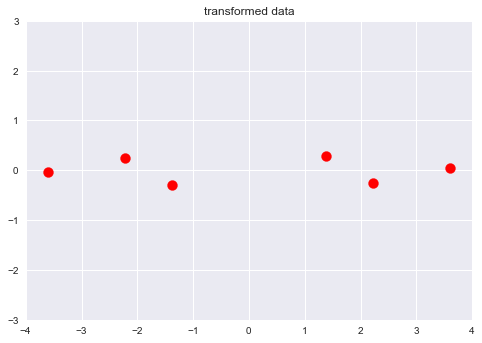

In [8]:
# 새로운 차원에 -1~1 까지의 값으로 정규화 시킨것
plt.scatter(Z[:,0], Z[:,1], c='r', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed data")
plt.show()

(-4, 4)

(-3, 3)

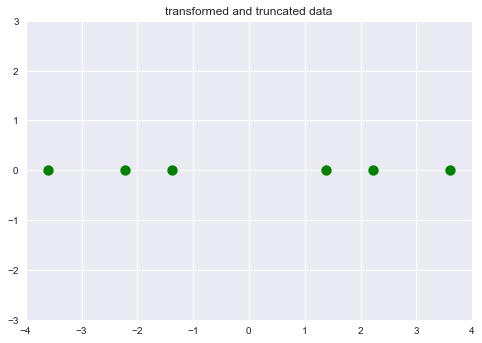

In [9]:
plt.scatter(Z[:,0], np.zeros_like(Z[:,1]), c='g', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed and truncated data")
plt.show()

## 성분수의 결정 

성분의 수가 같은 PCA 로 변환된 데이터의 공분산 행렬의 고유값은 <br> 
원래 데이터의 공분산 행렬의 고유값과 일치한다. 

성분 수를 줄여야 하는 경우 가장 작은 고유값 성분 부터 제거한다. 

* 원래의 데이터 X 의 공분산 행렬  XTX 의 고유값

λ1,λ2,λ3,⋯,λD

 
* PCA 변환한 데이터 Z 의 공분산 행렬 ZTZ 의 고유값

λ1,⋯,λL

* Explained Variance

$\dfrac{\lambda_1 +  \cdots + \lambda_L}{\lambda_1 + \lambda_2 + \lambda_3 + \cdots + \lambda_D} < 1$


<Container object of 13 artists>

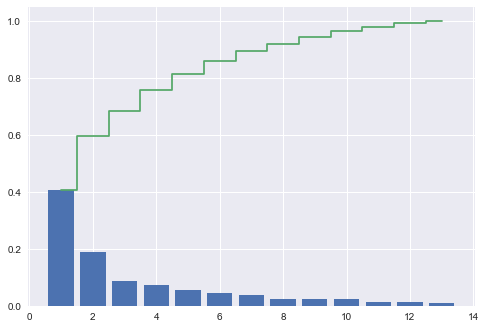

In [4]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA

wine = fetch_mldata("wine")
X,y = wine.data, wine. target

pca = PCA().fit(X)
var = pca.explained_variance_
cmap = sns.color_palette()
plt.bar(np.arange(1,len(var)+1), var/np.sum(var), align="center", color=cmap[0])
plt.step(np.arange(1,len(var)+1), np.cumsum(var)/np.sum(var), where="mid", color=cmap[1])
plt.show()

# 42절: 클러스터링 

# K-Means 클러스터링

* 클러스터링(clustering): 독립 변수의 특성만으로 데이터의 그룹 즉, 클러스터(cluster)를 형성하는 작업

## K-Means

단순하고 빠름 

목적함수 값이 최소화될 때까지 클러스터의 수 K 와 각 클러스터의 중심(centroid) μk 를 반복해서 찾는 것

* 목적 함수 $J = \sum_{k=1}^K \sum_{i \in C_k} d(x_i, \mu_k)$

d 는 두 데이터의 유사도 함수(Similarity Function) 혹은 거리(Distance)

1. 임의의 중심값  μkμk  를 고른다. (보통 데이터 샘플 중의 하나를 선택)
2. 중심에서 각 샘플 데이터까지의 거리를 계산
3. 각 데이터 샘플에서 가장 가까운 중심을 선택하여 클러스터 갱신
4. 다시 만들어진 클러스터에 대해 중심을 다시 계산하고 1 ~ 4를 반복


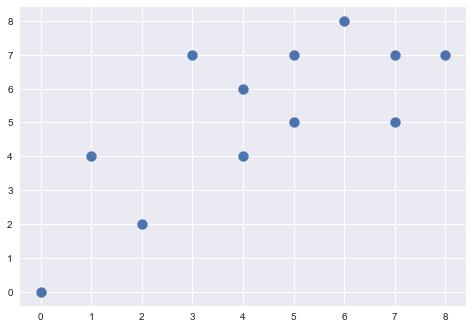

In [5]:
X = np.array([[7, 5],[5, 7],[7, 7],[4, 4],[4, 6],[1, 4],[0, 0],[2, 2],[8, 7],[6, 8],[5, 5],[3, 7]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.show()

In [8]:
from sklearn.cluster import KMeans
# 2 개의 클러스터로 되어 있는 모델 구축 
model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=1, random_state=1).fit(X)

[ 6.6  6.8] [ 2.71428571  4.        ]


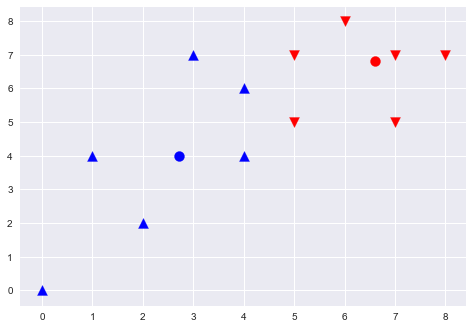

In [9]:
c0, c1 = model.cluster_centers_
print(c0, c1)
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100, marker='v', c='r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100, marker='^', c='b')
plt.scatter(c0[0], c0[1], s=100, c="r")
plt.scatter(c1[0], c1[1], s=100, c="b")
plt.show()

In [10]:
def kmeans_df(c0, c1):
    df = pd.DataFrame(np.hstack([X, 
                                np.linalg.norm(X - c0, axis=1)[:, np.newaxis], 
                                np.linalg.norm(X - c1, axis=1)[:, np.newaxis], 
                                model.labels_[:, np.newaxis]]),
                    columns=["x0", "x1", "d0", "d1", "c"])
    return df

# ["x0", "x1", "d0", "d1", "c"] 실제값, 2개의중심과거리, 속한클러스터  
kmeans_df(c0, c1)

,x0,x1,d0,d1,c
0,7.0,5.0,1.843909,4.400835,0.0
1,5.0,7.0,1.612452,3.771537,0.0
2,7.0,7.0,0.447214,5.231381,0.0
3,4.0,4.0,3.820995,1.285714,1.0
4,4.0,6.0,2.720294,2.377617,1.0
5,1.0,4.0,6.260990,1.714286,1.0
6,0.0,0.0,9.476286,4.833978,1.0
7,2.0,2.0,6.648308,2.123724,1.0
8,8.0,7.0,1.414214,6.077728,0.0
9,6.0,8.0,1.341641,5.176477,0.0


In [11]:
model.score(X)

-63.004081632653012

[ 1.  2.] [ 5.44444444  6.22222222]


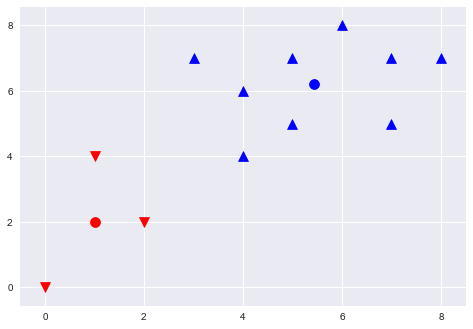

,x0,x1,d0,d1,c
0,7.0,5.0,6.708204,1.978277,1.0
1,5.0,7.0,6.403124,0.895806,1.0
2,7.0,7.0,7.810250,1.739164,1.0
3,4.0,4.0,3.605551,2.650413,1.0
4,4.0,6.0,5.000000,1.461438,1.0
5,1.0,4.0,2.000000,4.969040,0.0
6,0.0,0.0,2.236068,8.267891,0.0
7,2.0,2.0,1.000000,5.448978,0.0
8,8.0,7.0,8.602325,2.671292,1.0
9,6.0,8.0,7.810250,1.862562,1.0


In [13]:
# 모델을 100번 돌려서 했을 떄
model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=100, random_state=0).fit(X)
c0, c1 = model.cluster_centers_
print(c0, c1)
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100, marker='v', c='r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100, marker='^', c='b')
plt.scatter(c0[0], c0[1], s=100, c="r")
plt.scatter(c1[0], c1[1], s=100, c="b")
plt.show()
kmeans_df(c0, c1)

## K-Means++

최초의 중심값을 설정하기 위한 알고리즘

1. 중심값을 저장할 집합 M  준비
2. 일단 하나의 중심 μ0 를 랜덤하게 선택하여 M 에 넣는다.
3. M 에 속하지 않는 모든 샘플  xi 에 대해 거리 d(M,xi) 를 계산. d(M,xi) 는 M 안의 모든 샘플  μk 에 대해 d(μk,xi) 를 계산하여 가장 작은 값 선택
4. d(M,xi) 에 비례한 확률로 다음 중심 μ 를 선택.
5. K 개의 중심을 선택할 때까지 반복
6. K-Means 알고리즘 사용

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[]

[]

[]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[]

[]

[]

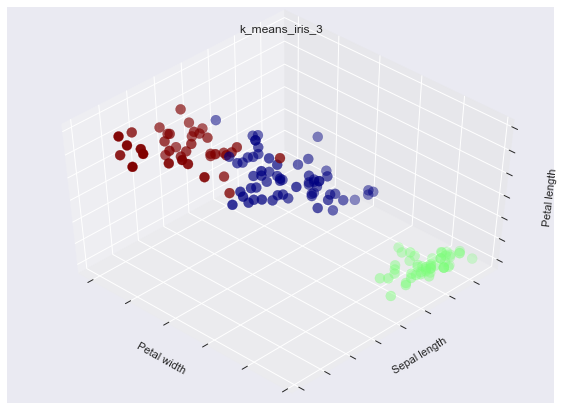

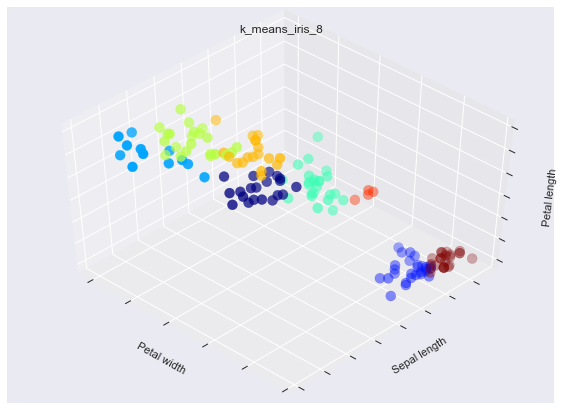

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib as mpl

np.random.seed(5)
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8)}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum)
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    plt.cla()
    est.fit(X)
    labels = est.labels_
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float), s=100, cmap=mpl.cm.jet)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    plt.title(name)
    fignum = fignum + 1

plt.show()

## 클러스터링 성능 기준
* 정확한 답(클러스터의 갯수 및 소속)을 알고 있는 경우
    - Adjusted Rand index
    - Adjusted Mutual Information
    - Homogeneity, completeness and V-measure
    - Fowlkes-Mallows scores
* 정확한 답(클러스터의 갯수 및 소속)을 모르는 경우
    - Silhouette Coefficient
    - Calinski-Harabaz Index
    
$s = \dfrac{b - a}{\max{(a, b)}}$
* a  : 같은 클러스터에 속한 원소들의 평균 거리
* b  : 다른 클러스터 중 가장 가까운 클러스터까지의 평균 거리


http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [27]:
InteractiveShell.ast_node_interactivity = "last"

(-0.1, 1)

(0, 530)

For n_clusters = 2 The average silhouette_score is : 0.704978749608


[]

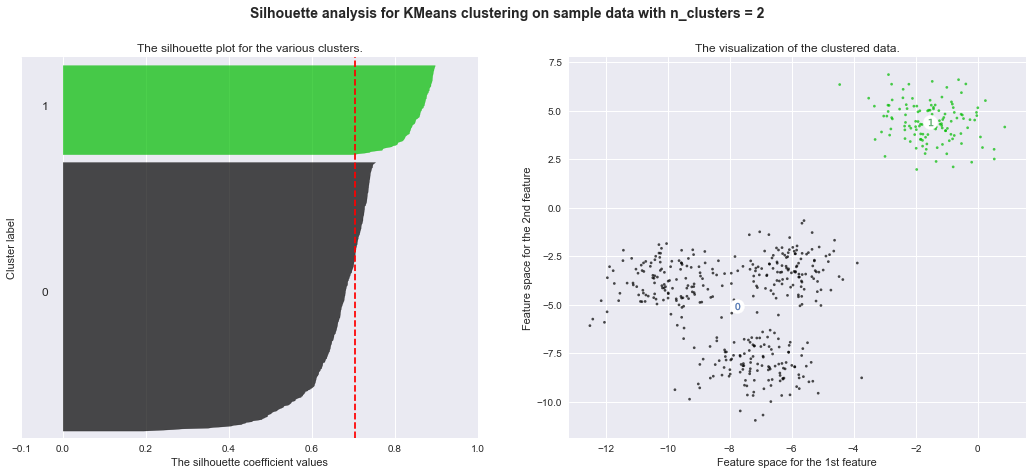

(-0.1, 1)

(0, 540)

For n_clusters = 3 The average silhouette_score is : 0.588200401213


[]

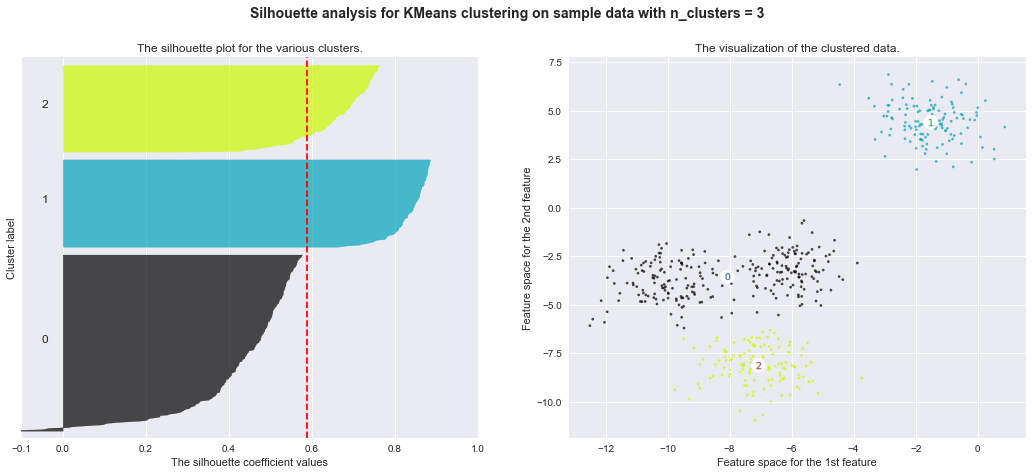

(-0.1, 1)

(0, 550)

For n_clusters = 4 The average silhouette_score is : 0.650518663273


[]

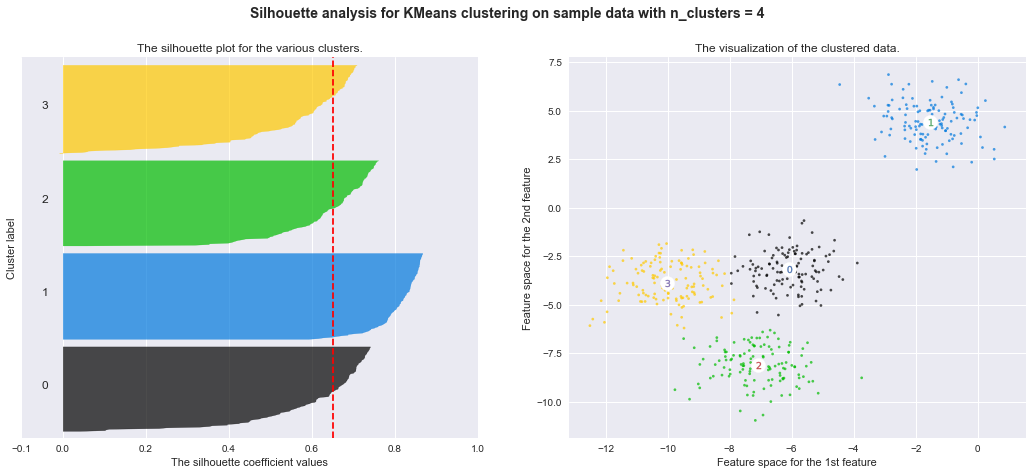

(-0.1, 1)

(0, 560)

For n_clusters = 5 The average silhouette_score is : 0.563764690262


[]

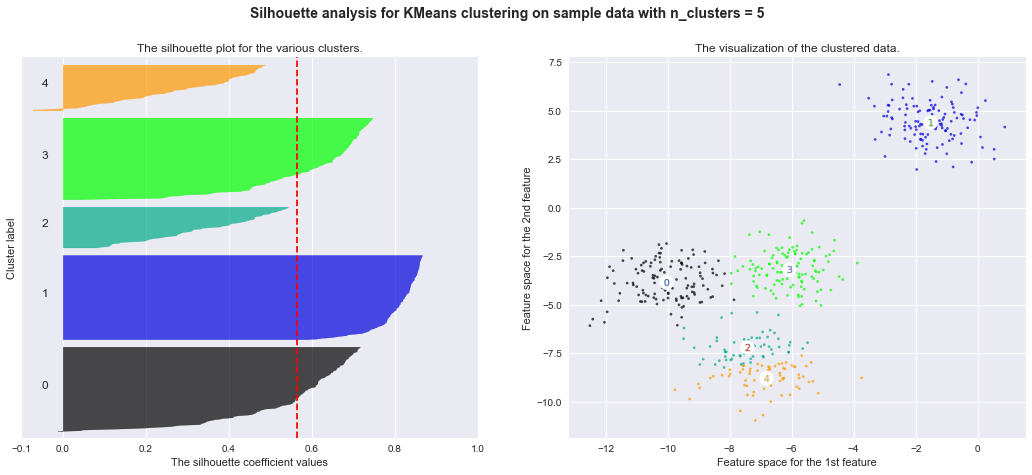

(-0.1, 1)

(0, 570)

For n_clusters = 6 The average silhouette_score is : 0.450466629437


[]

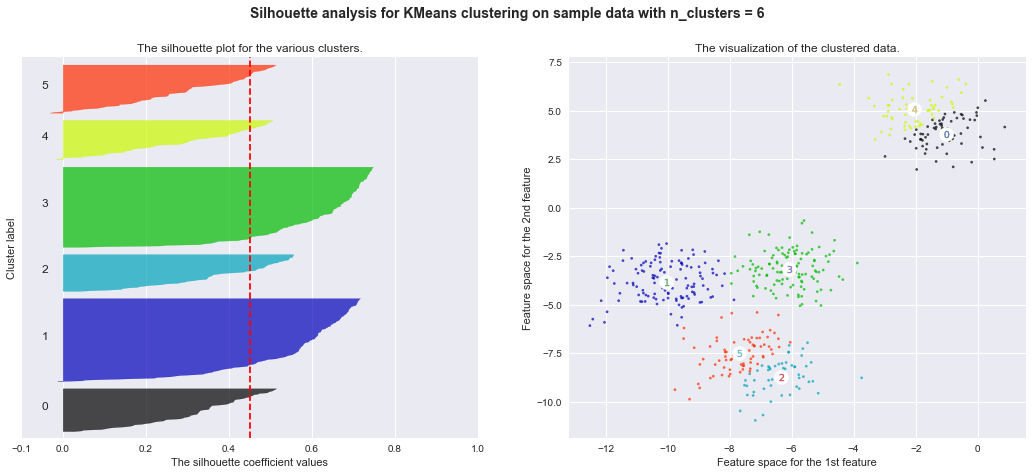

In [28]:
# Silhouette Coefficient 예제

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# Affinity Propagation

모든 데이터가 특정한 기준에 따라 자신을 대표할 대표 데이터를 선택한다. 만약 스스로가 자기 자신을 대표하게 되면 클러스터의 중심이 된다.

* responsibility  r(i,k)
   - k 번째 데이터가  ii 번째 데이터의 대표가 되어야 한다는 근거
* availability  a(i,k) 
   - i 번째 데이터가  kk 번째 데이터를 대표로 선택해야 한다는 근거
* 다음 수식을 수렴할 때까지 반복
    - $r(i, k) \leftarrow s(i, k) - \max_{k' \neq k} ( a(i, k') + s(i, k'))$
    - $a(i, k) \leftarrow \min(0, r(k, k) + \sum_{i' \neq i,k} r(i', k))$


http://scikit-learn.org/stable/auto_examples/cluster/plot_affinity_propagation.html

In [17]:
from sklearn.datasets.samples_generator import make_blobs

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

In [18]:
from sklearn.cluster import AffinityPropagation

model = AffinityPropagation(preference=-50).fit(X)

In [19]:
cluster_centers_indices = model.cluster_centers_indices_
labels = model.labels_
n_clusters_ = len(cluster_centers_indices)

from sklearn import metrics

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


In [21]:
InteractiveShell.ast_node_interactivity = "last"

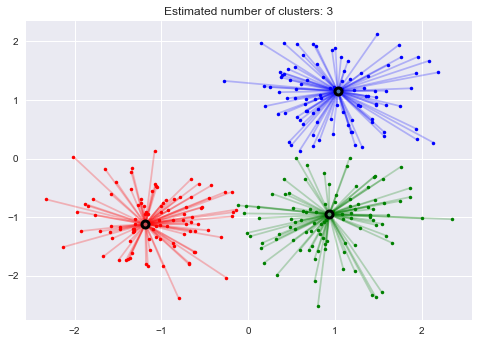

In [22]:
from itertools import cycle

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.25)
    plt.plot(cluster_center[0], cluster_center[1], 'o', mec='k', mew=3, markersize=7)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [23]:
InteractiveShell.ast_node_interactivity = "all"

# 계층적 클러스터링

하나의 데이터 샘플을 하나의 클러스터로 보고 가장 유사도가 높은 클러스터를 합치면서 클러스터 갯수를 줄여 가는 방법

### 클러스터간의 유사도 측정 방법 

* centroid : 두 클러스터의 중심점(centroid)를 정의한 다음 두 중심점의 거리로 측정 한다. 
* median : 이 방법은 Agglomerative Clustering 에서 사용할 수 있는 귀납적 방법으로 centroid 방법의 변형이다. 만약 클러스터 u 가 클러스터 s 와 클러스터 t 가 결합하여 생겼다면 클러스터 u 의 중심점은 새로 계산하지 않고 원래 클러스터의 두 클러스터의 중심점의 평균을 사용 한다.
* single : 클러스터 u 의 모든 데이터 i 와 클러스터 v 의 모든 데이터 j 의 모든 조합에 대해 거리를 측정해서 최소값을 구한다. 최소 거리(Nearest Point) 방법이라고도 한다.
* complete : 클러스터 u 의 모든 데이터 i 와 클러스터 v 의 모든 데이터 j 의 모든 조합에 대해 거리를 측정한 후 가장 큰 값을 구한다. Farthest Point Algorithm 또는 Voor Hees Algorithm 이라고도 한다.
* average : 클러스터 u 의 모든 데이터  i 와 클러스터 v 의 모든 데이터  j 의 모든 조합에 대해 거리를 측정한 후 평균을 구한다. |u| 와  |v| 는 각각 두 클러스터의 원소의 갯수를 뜻한다.
* weighted : 이 방법은 Agglomerative Clustering 에서 사용할 수 있는 귀납적 방법이다. 만약 클러스터 u 가 클러스터 s 와 클러스터 t 가 결합하여 생겼다면 다음과 같이 원래 클러스터까지의 두 거리의 평균을 사용한다.
* Ward : 이 방법은 Agglomerative Clustering 에서 사용할 수 있는 귀납적 방법이다. 만약 클러스터 u 가 클러스터  ss 와 클러스터 t 가 결합하여 생겼다면 다음과 같이 두 클러스터의 거리의 가중 평균에서 원래의 두 클래스터 사이의 거리를 보정한 값을 사용한다.

## SciPy의 계층적 클러스터링

* scipy.cluster.hierarchy.linkage
    - Agglomerative 방식 클러스터링
* scipy.cluster.hierarchy.dendrogram
    - 클러스터링 결과를 tree 형태로 시각화


* 참고 자료

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Perform-the-Hierarchical-Clustering

(150, 2)


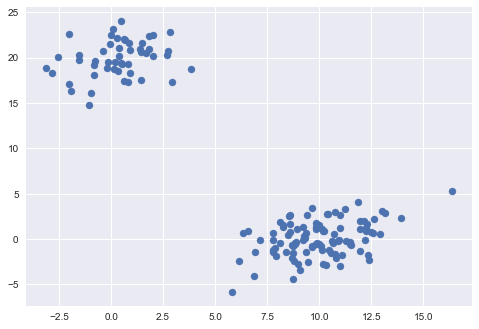

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram
np.set_printoptions(precision=5, suppress=True) 

np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)

plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

In [32]:
Z = linkage(X, 'ward')
Z[:20]

array([[  52.     ,   53.     ,    0.04151,    2.     ],
       [  14.     ,   79.     ,    0.05914,    2.     ],
       [  33.     ,   68.     ,    0.07107,    2.     ],
       [  17.     ,   73.     ,    0.07137,    2.     ],
       [   1.     ,    8.     ,    0.07543,    2.     ],
       [  85.     ,   95.     ,    0.10928,    2.     ],
       [ 108.     ,  131.     ,    0.11007,    2.     ],
       [   9.     ,   66.     ,    0.11302,    2.     ],
       [  15.     ,   69.     ,    0.11429,    2.     ],
       [  63.     ,   98.     ,    0.1212 ,    2.     ],
       [ 107.     ,  115.     ,    0.12167,    2.     ],
       [  65.     ,   74.     ,    0.1249 ,    2.     ],
       [  58.     ,   61.     ,    0.14028,    2.     ],
       [  62.     ,  152.     ,    0.1726 ,    3.     ],
       [  41.     ,  158.     ,    0.1779 ,    3.     ],
       [  10.     ,   83.     ,    0.18635,    2.     ],
       [ 114.     ,  139.     ,    0.20419,    2.     ],
       [  39.     ,   88.     ,

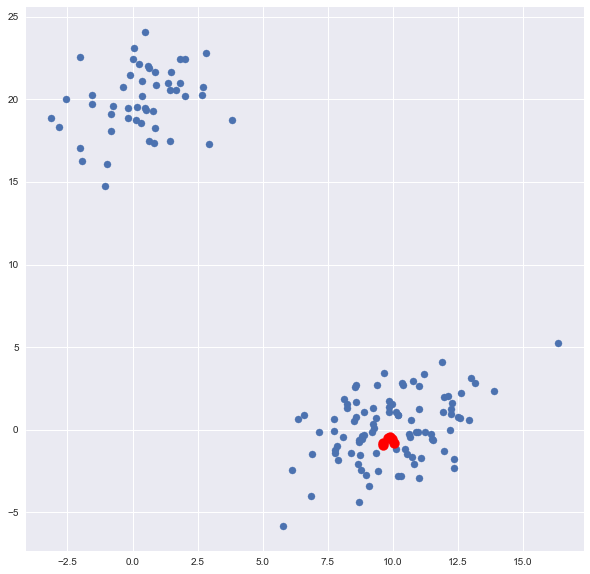

In [33]:
idxs = [33, 68, 62, 82, 63, 98]
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], s=50)
plt.scatter(X[idxs,0], X[idxs,1], c='r', s=100) 
plt.show()

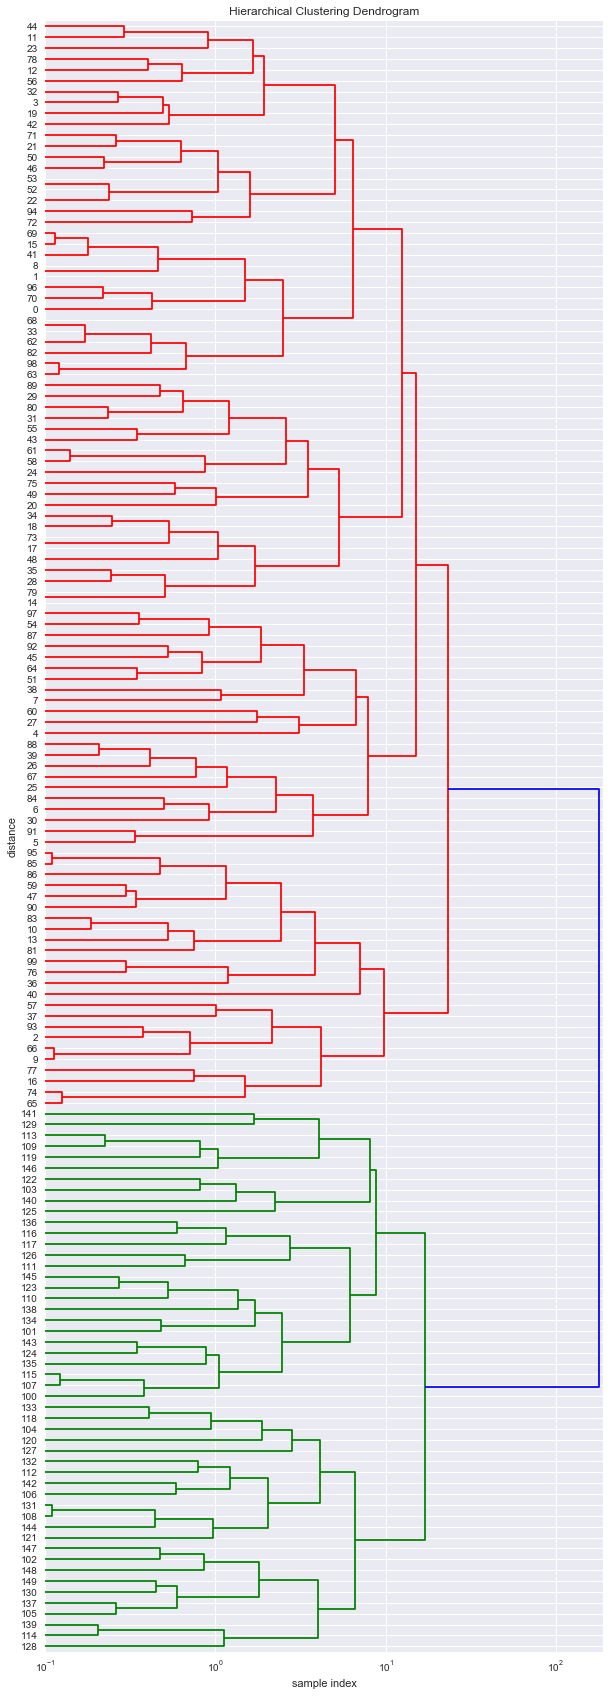

In [34]:
plt.figure(figsize=(10,30))
ax = plt.subplot(111)
dendrogram(Z, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
ax.set_xlim(xmin=0.1)
ax.set_xscale('log')
plt.show()